In [1]:
from venn import generate_petals, venn
from matplotlib.pyplot import subplots

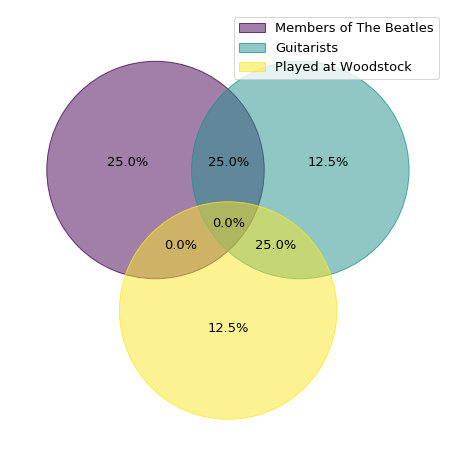

In [2]:
musicians = {
    "Members of The Beatles": {"Paul McCartney", "John Lennon", "George Harrison", "Ringo Starr"},
    "Guitarists": {"John Lennon", "George Harrison", "Jimi Hendrix", "Eric Clapton", "Carlos Santana"},
    "Played at Woodstock": {"Jimi Hendrix", "Carlos Santana", "Keith Moon"}
}
petals_3 = generate_petals(musicians.values(), fmt="{percentage:.1f}%")
_ = venn(petals=petals_3, labels=musicians.keys())

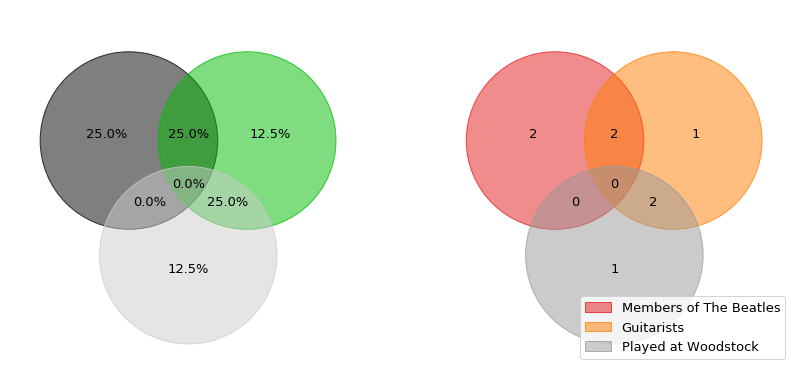

In [3]:
f, [ax1, ax2] = subplots(1, 2, figsize=(14, 8))
_ = venn(petals=petals_3, labels=musicians.keys(), cmap="nipy_spectral", ax=ax1, legend_loc=None)
petals_3a = generate_petals(musicians.values(), fmt="{size}")
_ = venn(petals=petals_3a, labels=musicians.keys(), cmap="Set1", ax=ax2, legend_loc="lower right")

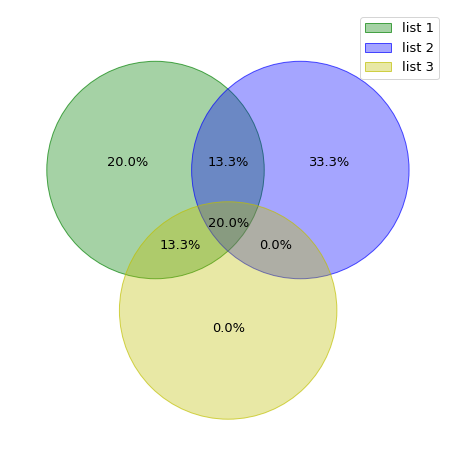

In [8]:
petals = generate_petals([range(10), range(5, 15), range(3, 8)], fmt="{percentage:.1f}%")
_ = venn(petals=petals, labels=["list 1", "list 2", "list 3"], cmap=["g", "b", "y"], alpha=0.35)

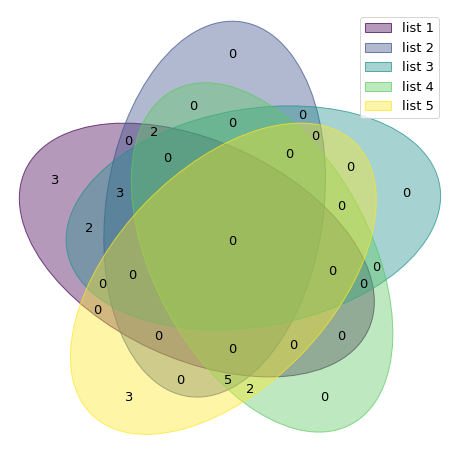

In [9]:
petals = generate_petals([range(10), range(5, 15), range(3, 8), range(8, 17), range(10, 20)], fmt="{size}")
_ = venn(petals=petals, labels=["list 1", "list 2", "list 3", "list 4", "list 5"], alpha=0.4)

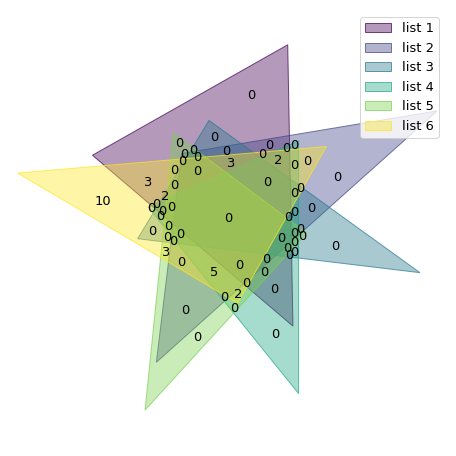

In [28]:
petals = generate_petals([range(10), range(5, 15), range(3, 8), range(8, 17), range(10, 20), range(30)], fmt="{size}")
_ = venn(petals=petals, labels=["list 1", "list 2", "list 3", "list 4", "list 5", "list 6"], alpha=0.4)

C:\MSYS\home\Kirill\projects\pyvenn\venn\_backwards_compatibility.py:7: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petals()` instead
  warn(mask.format(old_name, new_name))
C:\MSYS\home\Kirill\projects\pyvenn\venn\_backwards_compatibility.py:7: UserWarning: `venn5()` is retained for backwards compatibility; use `venn()` instead
  warn(mask.format(old_name, new_name))


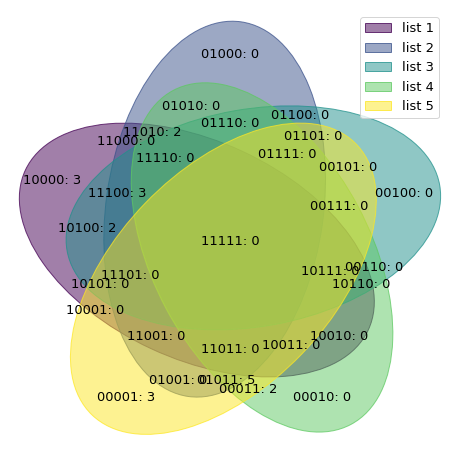

In [6]:
from venn import get_labels, venn5
labels = get_labels([range(10), range(5, 15), range(3, 8), range(8, 17), range(10, 20)], fill=['number', 'logic'])
_ = venn5(labels, names=['list 1', 'list 2', 'list 3', 'list 4', 'list 5'])

#### Trying out logic for Eulers

In [3]:
from itertools import chain
from venn._venn import generate_logics, draw_ellipse, select_colors, draw_text
from venn._constants import VENN_AXIS_KW
from matplotlib.patches import Ellipse
from matplotlib.colors import to_rgba
from math import sqrt

In [10]:
def better_petals(datasets, fmt="{size} ({percentage:.1f}%)"):
    """Generate petal descriptions for venn diagram based on set sizes"""
    datasets = list(datasets)
    n_sets = len(datasets)
    datasets = [set(datasets[i]) for i in range(n_sets)]
    dataset_union = set(chain(*datasets))
    universe_size = len(dataset_union)
    petals = {}
    for logic in generate_logics(n_sets):
        petal_set = dataset_union
        sets_for_intersection = [
            datasets[i] for i in range(n_sets) if logic[i] == "1"
        ]
        for s in sets_for_intersection:
            petal_set = petal_set & s
        sets_for_difference = [
            datasets[i] for i in range(n_sets) if logic[i] == "0"
        ]
        for s in sets_for_difference:
            petal_set = petal_set - s
        petal_label = fmt.format(
            logic=logic, size=len(petal_set),
            percentage=(100*len(petal_set)/universe_size)
        )
        petals[logic] = petal_label, len(petal_set)
    return petals

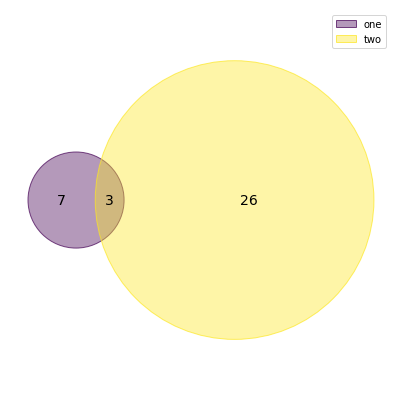

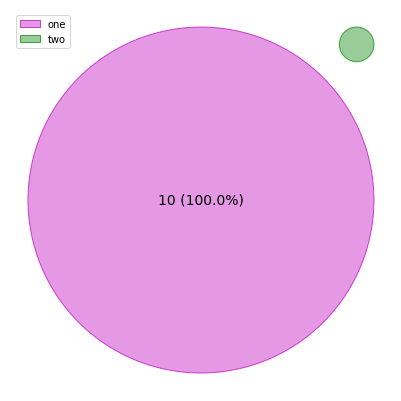

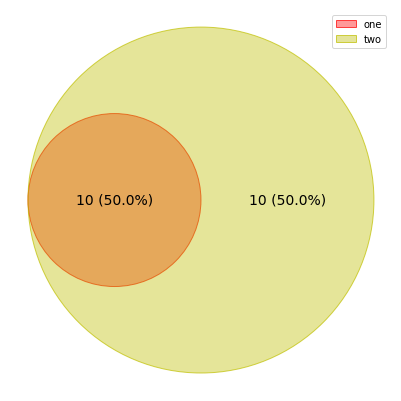

In [27]:
EULER_AXIS_KW = {**VENN_AXIS_KW, "xlim": (-.05, 1.05), "ylim": (-.05, 1.05)}

def draw_euler2(*, petals, labels, datasets, figsize=(7, 7), cmap="viridis"):
    universe_size = len(set.union(*datasets))
    # NB! diameters should be sqrt() of what they are; this will require changing circle_coords and petal_label_coords
    diameters = [len(v)/universe_size for v in datasets]
    circle_coords = [(diameters[0]/2, .5), (1-diameters[1]/2, .5)]
    virtual_middle = (circle_coords[0][0] + circle_coords[1][0])/2
    petal_label_coords = [
        (virtual_middle - sum(diameters)/4, .5),
        (virtual_middle + (diameters[0] - diameters[1])/4, .5),
        (virtual_middle + sum(diameters)/4, .5)
    ]
    figure, ax = subplots(1, 1, figsize=figsize, subplot_kw=EULER_AXIS_KW)
    colors = select_colors(n_colors=2, cmap=cmap)
    for i, dataset in enumerate(datasets):
        if not dataset:
            circle_coords[i] = (.05 + .9*i, .05 + .9*i)
            diameters[i] = .1
            petal_label_coords[-i] = circle_coords[i]
        draw_ellipse(ax, *circle_coords[i], diameters[i], diameters[i], 0, colors[i])
    has_heart = set.intersection(*datasets)
    for label_coords, logic in zip(petal_label_coords, ["10", "11", "01"]):
        petal_label, size = petals[logic]
        if size != 0:
            draw_text(ax, *label_coords, petal_label, fontsize=14)
    ax.legend(labels)
    return figure, ax

def euler(data, fmt="{size} ({percentage:.1f}%)", **kwargs):
    petals = better_petals(data.values(), fmt=fmt)
    if len(data) == 2:
        func = draw_euler2
    elif len(data) == 3:
        func = draw_euler3 # raise NotImplementedError("euler3() not implemented yet")
    else:
        raise ValueError("euler() only is only applicable for two or three sets")
    return func(petals=petals, labels=data.keys(), datasets=data.values(), **kwargs)
    
_ = euler({"one": set(range(10)), "two": set(range(7, 36))}, fmt="{size}")
_ = euler({"one": set(range(10)), "two": set()}, cmap=list("mg"))
_ = euler({"one": set(range(10)), "two": set(range(20))}, cmap=list("ry"))

#### Attempt at circly 6-way venn

In [75]:
from numpy.random import choice
from numpy import sin, cos, pi, arange
from venn._venn import draw_text
from functools import partial

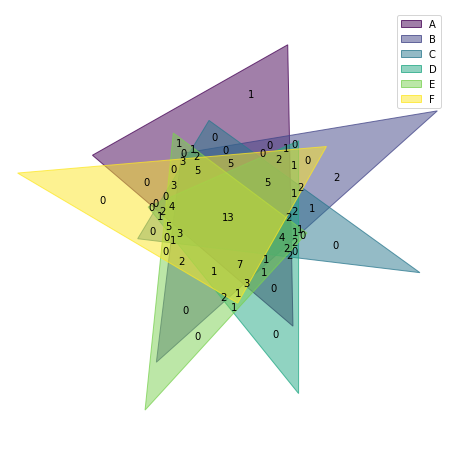

In [40]:
six = {k: choice(100, 70, replace=False) for k in list("ABCDEF")}
petals = generate_petals(six.values(), fmt="{size}")
_ = venn(petals=petals, labels=six.keys(), figsize=(8, 8), fontsize=10)

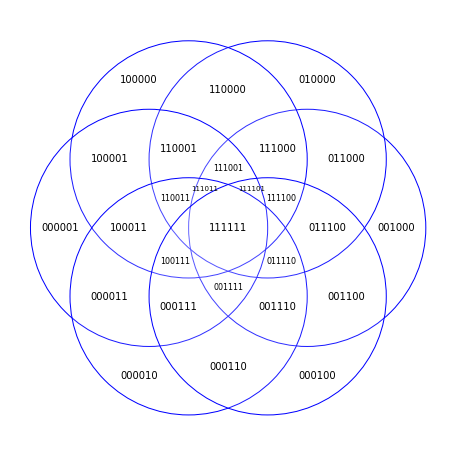

In [157]:
figure, ax = subplots(1, 1, figsize=(8, 8), subplot_kw=EULER_AXIS_KW)
d = .6
transparent = to_rgba("white", alpha=.1)
#ax.add_patch(Ellipse(xy=(.5,.5), width=d, height=d, facecolor="white", edgecolor="gray"))

for angle in arange(0, 2*pi, pi/3):
    x = .5 + d/3 * cos(angle)
    y = .5 + d/3 * sin(angle)
    ax.add_patch(Ellipse(xy=(x, y), width=d, height=d, facecolor=transparent, edgecolor="blue"))

# all
draw_text(ax, .5, .5, "111111", 10)

# individual
draw_text(ax, .275, .875, "100000", 10)
draw_text(ax, .725, .875, "010000", 10)
draw_text(ax, .925, .500, "001000", 10)
draw_text(ax, .725, .125, "000100", 10)
draw_text(ax, .275, .125, "000010", 10)
draw_text(ax, .075, .500, "000001", 10)

# two-way intersections
draw_text(ax, .500, .850, "110000", 10)
draw_text(ax, .800, .675, "011000", 10)
draw_text(ax, .800, .325, "001100", 10)
draw_text(ax, .500, .150, "000110", 10)
draw_text(ax, .200, .325, "000011", 10)
draw_text(ax, .200, .675, "100001", 10)

# three-way intersections
draw_text(ax, .375, .700, "110001", 10)
draw_text(ax, .625, .700, "111000", 10)
draw_text(ax, .750, .500, "011100", 10)
draw_text(ax, .625, .300, "001110", 10)
draw_text(ax, .375, .300, "000111", 10)
draw_text(ax, .250, .500, "100011", 10)

# four-way intersections
draw_text(ax, .500, .650, "111001", 8)
draw_text(ax, .635, .575, "111100", 8)
draw_text(ax, .635, .415, "011110", 8)
draw_text(ax, .500, .350, "001111", 8)
draw_text(ax, .365, .415, "100111", 8)
draw_text(ax, .365, .575, "110011", 8)

# five-way intersections
draw_text(ax, .440, .600, "111011", 7)
draw_text(ax, .560, .600, "111101", 7)